In [15]:
import numpy as np
import math
import pandas as pd
import copy

In [16]:
#Inverse branches
def t(x,i):
    if i == 1 :
        a = x/2
        return a
    else:
        a = (x+1)/2
        return a

def inv(x,n):
    return math.floor(x*n)

#Composition with t(x,j)
def tf(F,j):
    n = F.size
    Aux = copy.deepcopy(F)
    
    for i in range(n):
        x = i/n
        x = t(x,j)
        Aux[i] = F[inv(x,n)]
    return Aux

#Potential
def A(x):
    return -(x-1/3)*(x-1/3)

#Iterate K, N times with n-point mesh j/n 
def K(N,n,F):
    for i in range(N):
        F1 = tf(F,1)
        F2 = tf(F,2)
        for j in range(n):
            F1[j] = F1[j] + A(t(j/n,1))
            F2[j] = F2[j] + A(t(j/n,2))
        F = (np.maximum(F1,F2))
        F = F - np.amax(F)
    return [F,F1,F2]

#Maximal value
def M(F):
    res=0
    n = len(F)
    res = F[math.floor(n/2)]-F[0]+A(1/2)
    return print(res)

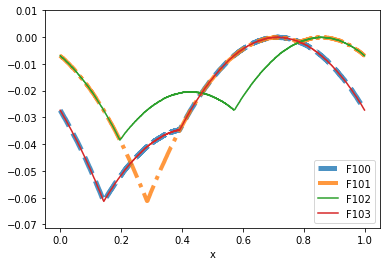

In [42]:
n = 2000
N = 100
F = np.zeros(n)

Result = K(N,n,F)
F1 = np.copy(Result[0])

Result = K(1,n,F1)
F2 = np.copy(Result[0])

Result = K(1,n,F2)
F3 = np.copy(Result[0])

Result = K(1,n,F3)
F4 = np.copy(Result[0])



F = list(F1)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
Resultd1 = pd.DataFrame(data = D ,columns = ["x","F100"])

F = list(F2)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
Resultd2 = pd.DataFrame(data = D ,columns = ["x","F101"])

F = list(F3)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
Resultd3 = pd.DataFrame(data = D ,columns = ["x","F102"])

F = list(F4)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
Resultd4 = pd.DataFrame(data = D ,columns = ["x","F103"])



ymin = np.amin(F2)

##PLOT
ax = Resultd1.plot(x = Resultd1.columns.values[0], y = Resultd1.columns.values[1],style = '--',linewidth=5.0,alpha=0.8);
Resultd2.plot(ax=ax,x = Resultd2.columns.values[0], y = Resultd2.columns.values[1], style = '-.',linewidth=4, alpha=0.8);
Resultd3.plot(ax=ax,x = Resultd3.columns.values[0], y = Resultd3.columns.values[1]);
Resultd4.plot(ax=ax,x = Resultd4.columns.values[0], y = Resultd4.columns.values[1]);


ax.set_ylim([ymin-0.01,0.01])


#save plot
ax.figure.savefig('../imagens/diverge.pdf')